In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('financial_data.csv')

In [4]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [6]:
data.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [7]:
data.describe

<bound method NDFrame.describe of        entry_id  age  pay_schedule  home_owner  income  months_employed  \
0       7629673   40     bi-weekly           1    3135                0   
1       3560428   61        weekly           0    3180                0   
2       6934997   23        weekly           0    1540                6   
3       5682812   40     bi-weekly           0    5230                0   
4       5335819   33  semi-monthly           0    3590                0   
5       8492423   21        weekly           0    2303                0   
6       7948313   26     bi-weekly           0    2795                0   
7       4297036   43     bi-weekly           0    5000                0   
8       6493191   32  semi-monthly           0    5260                3   
9       8908605   51     bi-weekly           1    3055                0   
10      8990111   61     bi-weekly           1    3270                0   
11      3818616   34        weekly           0    3877            

In [8]:
data.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [9]:
# remove categorical variables to plot histogram
data2 = data.drop(columns=['entry_id','pay_schedule','e_signed'])

In [10]:
data2.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12


In [11]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)


Text(0.5,0.98,'Histograms of Numerical Columns')

<Figure size 1080x864 with 0 Axes>

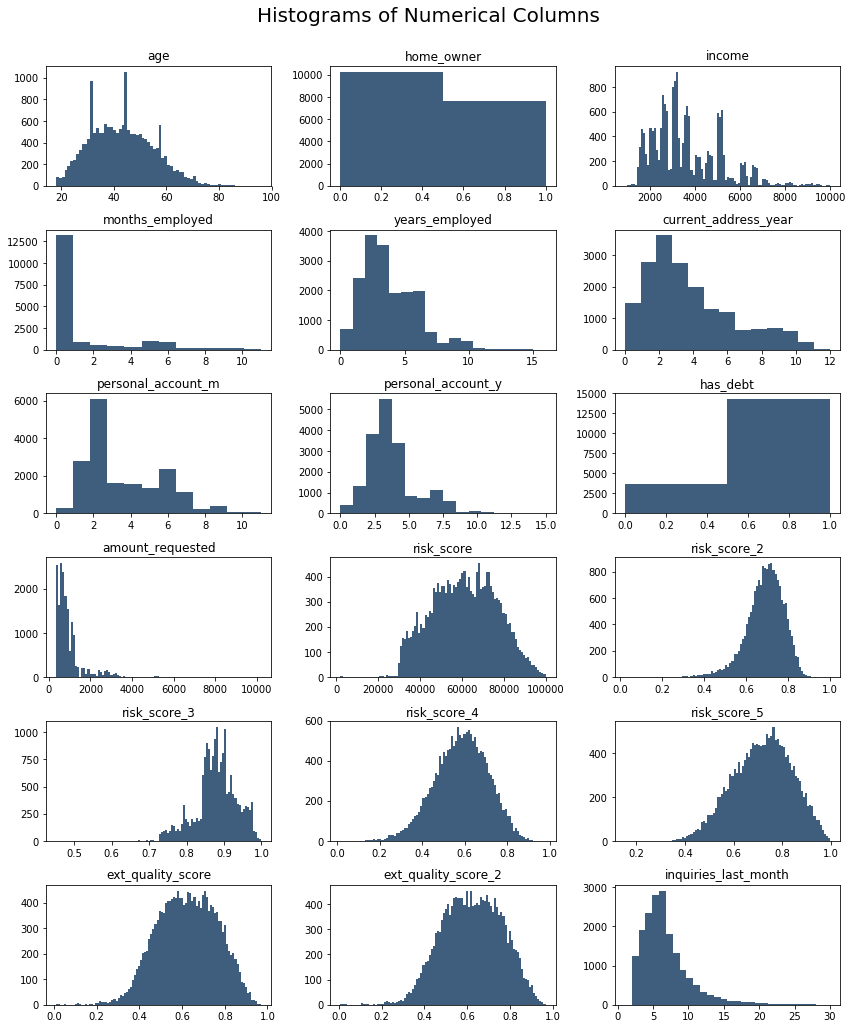

In [27]:
fig = plt.figure(figsize=(12, 15))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(data2.columns.values[i])

    vals = np.size(data2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(data2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

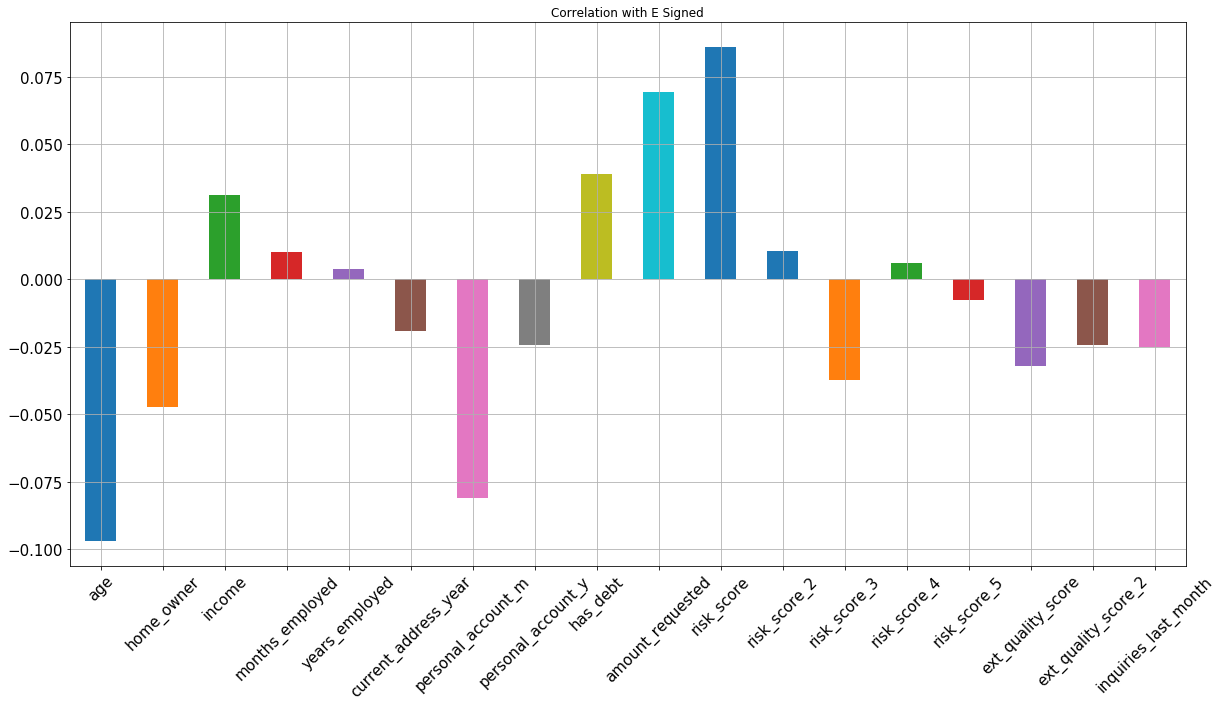

In [28]:
## Correlation with Response Variable (Note: Models like RF are not linear like these)

data2.corrwith(data.e_signed).plot.bar(
        figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

In [30]:
## Correlation Matrix
sns.set(style="white")

In [31]:
# Compute the correlation matrix
corr = data2.corr()

In [32]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

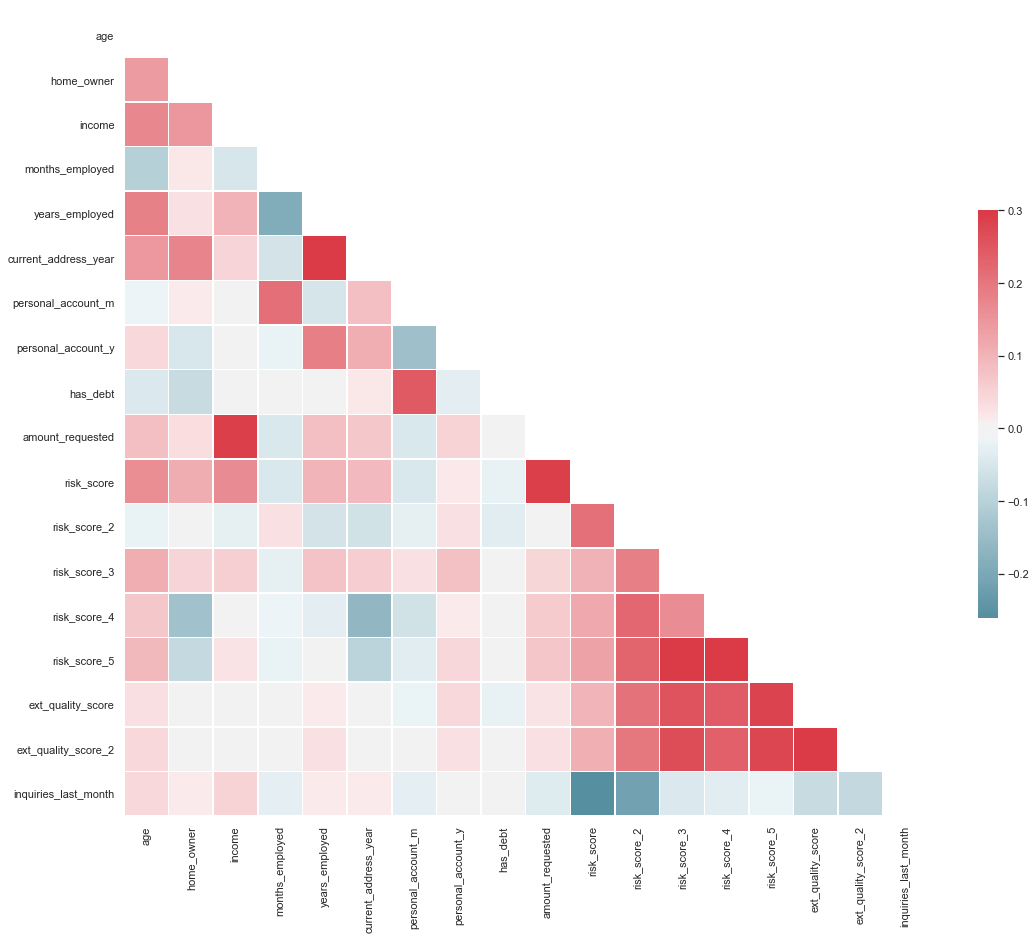

In [33]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

random.seed(100)

### Data Preprocessing ###

In [35]:
dataset = pd.read_csv('financial_data.csv')

In [36]:
# Feature Engineering

dataset = dataset.drop(columns = ['months_employed'])
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

In [37]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [38]:
# Removing extra columns
response = dataset["e_signed"]
users = dataset['entry_id']
dataset = dataset.drop(columns = ["e_signed", "entry_id"])

In [39]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [41]:

## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [50]:

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [51]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.568398,0.577769,0.735996,0.647354


In [45]:

## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [58]:
model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [59]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.568398,0.577769,0.735996,0.647354
1,SVM (RBF),0.591569,0.605730,0.690871,0.645505
2,SVM (Linear),0.591569,0.605730,0.690871,0.645505


In [60]:

## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [62]:

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])



In [63]:
results = results.append(model_results, ignore_index = True)

In [64]:

## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))



Random Forest Classifier Accuracy: 0.61 (+/- 0.03)


In [65]:
# Applying Grid Search

# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

In [66]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [68]:

grid_search = grid_search.fit(X_train, y_train)


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Arjun\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Arjun\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000020C304055D0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Arjun\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\A...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000020C304055D0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Arjun\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\A...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\Arjun\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\Arjun\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(588, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\Arjun\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(588, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (588, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=588, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '\ngrid_search = grid_search.fit(X_train, y_train)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 17, 7, 54, 4, 939657, tzinfo=tzutc()), 'msg_id': '2c6eaef7736c4728a4506e0b7c4018a6', 'msg_type': 'execute_request', 'session': '62b862c51bb042999d7727d88f572819', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '2c6eaef7736c4728a4506e0b7c4018a6', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'62b862c51bb042999d7727d88f572819']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '\ngrid_search = grid_search.fit(X_train, y_train)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 17, 7, 54, 4, 939657, tzinfo=tzutc()), 'msg_id': '2c6eaef7736c4728a4506e0b7c4018a6', 'msg_type': 'execute_request', 'session': '62b862c51bb042999d7727d88f572819', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '2c6eaef7736c4728a4506e0b7c4018a6', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'62b862c51bb042999d7727d88f572819'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '\ngrid_search = grid_search.fit(X_train, y_train)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 17, 7, 54, 4, 939657, tzinfo=tzutc()), 'msg_id': '2c6eaef7736c4728a4506e0b7c4018a6', 'msg_type': 'execute_request', 'session': '62b862c51bb042999d7727d88f572819', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '2c6eaef7736c4728a4506e0b7c4018a6', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='\ngrid_search = grid_search.fit(X_train, y_train)\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '\ngrid_search = grid_search.fit(X_train, y_train)\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('\ngrid_search = grid_search.fit(X_train, y_train)\n',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('\ngrid_search = grid_search.fit(X_train, y_train)\n',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='\ngrid_search = grid_search.fit(X_train, y_train)\n', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '\ngrid_search = grid_search.fit(X_train, y_train)\n'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='\ngrid_search = grid_search.fit(X_train, y_train)\n', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-68-608fa00e9308>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 20c3715a160, executio...rue silent=False shell_futures=True> result=None>)
   2896             raise ValueError("Interactivity was %r" % interactivity)
   2897         try:
   2898             for i, node in enumerate(to_run_exec):
   2899                 mod = ast.Module([node])
   2900                 code = compiler(mod, cell_name, "exec")
-> 2901                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000020C399AAD20, file "<ipython-input-68-608fa00e9308>", line 2>
        result = <ExecutionResult object at 20c3715a160, executio...rue silent=False shell_futures=True> result=None>
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000020C399AAD20, file "<ipython-input-68-608fa00e9308>", line 2>, result=<ExecutionResult object at 20c3715a160, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000020C399AAD20, file "<ipython-input-68-608fa00e9308>", line 2>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport seaborn as sn', 'import pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport seaborn as sns', "data = pd.read_csv('financial_data.csv')", 'data.head()', 'data.columns()', 'data.columns', 'data.describe', 'data.isna().any()', "# remove categorical variables to plot histogram...p(columns=['entry_id','pay_schedule','e_signed'])", 'data2.head()', "fig = plt.figure(figsize=(15, 12))\nplt.suptitle('Histograms of Numerical Columns', fontsize=20)", 'data2.shape', 'data2.shape[1]', 'data2.shape', "get_ipython().run_line_magic('pinfo', 'plt.subplot')", 'for i in range(data2.shape[1]):\n    plt.subplot(...\n    if vals >= 100:\n        vals = 100\n    \n    ', 'for i in range(data2.shape[1]):\n    plt.subplot(...\n    if vals >= 100:\n        vals = 100\n    \n    ', "plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')\nplt.tight_layout(rect=[0, 0.03, 1, 0.95])", "plt.hist(data2.iloc[:, i], bins=vals, color='#3F5D7D')\nplt.tight_layout(rect=[0, 0.03, 1, 0.95])", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {4:    entry_id  age  pay_schedule  home_owner  inco...            12         0  

[5 rows x 21 columns], 6: Index(['entry_id', 'age', 'pay_schedule', 'home_...s_last_month', 'e_signed'],
      dtype='object'), 7: <bound method NDFrame.describe of        entry_i...        4         1  

[17908 rows x 21 columns]>, 8: entry_id                False
age               ...  False
e_signed                False
dtype: bool, 10:    age  home_owner  income  months_employed  yea...4634             0.744634                    12  , 11: Text(0.5,0.98,'Histograms of Numerical Columns'), 12: (17908, 18), 13: 18, 14: (17908, 18), 28: <matplotlib.axes._subplots.AxesSubplot object>, ...}, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X_test':             age  home_owner    income  years_emp...             1.976827  

[3582 rows x 19 columns], 'X_test2':             age  home_owner    income  years_emp...             1.976827  

[3582 rows x 19 columns], 'X_train':             age  home_owner    income  years_emp...           -0.505861  

[14326 rows x 19 columns], 'X_train2':             age  home_owner    income  years_emp...           -0.505861  

[14326 rows x 19 columns], ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport seaborn as sn', 'import pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport seaborn as sns', "data = pd.read_csv('financial_data.csv')", 'data.head()', 'data.columns()', 'data.columns', 'data.describe', 'data.isna().any()', "# remove categorical variables to plot histogram...p(columns=['entry_id','pay_schedule','e_signed'])", 'data2.head()', "fig = plt.figure(figsize=(15, 12))\nplt.suptitle('Histograms of Numerical Columns', fontsize=20)", 'data2.shape', 'data2.shape[1]', 'data2.shape', "get_ipython().run_line_magic('pinfo', 'plt.subplot')", 'for i in range(data2.shape[1]):\n    plt.subplot(...\n    if vals >= 100:\n        vals = 100\n    \n    ', 'for i in range(data2.shape[1]):\n    plt.subplot(...\n    if vals >= 100:\n        vals = 100\n    \n    ', "plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')\nplt.tight_layout(rect=[0, 0.03, 1, 0.95])", "plt.hist(data2.iloc[:, i], bins=vals, color='#3F5D7D')\nplt.tight_layout(rect=[0, 0.03, 1, 0.95])", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {4:    entry_id  age  pay_schedule  home_owner  inco...            12         0  

[5 rows x 21 columns], 6: Index(['entry_id', 'age', 'pay_schedule', 'home_...s_last_month', 'e_signed'],
      dtype='object'), 7: <bound method NDFrame.describe of        entry_i...        4         1  

[17908 rows x 21 columns]>, 8: entry_id                False
age               ...  False
e_signed                False
dtype: bool, 10:    age  home_owner  income  months_employed  yea...4634             0.744634                    12  , 11: Text(0.5,0.98,'Histograms of Numerical Columns'), 12: (17908, 18), 13: 18, 14: (17908, 18), 28: <matplotlib.axes._subplots.AxesSubplot object>, ...}, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X_test':             age  home_owner    income  years_emp...             1.976827  

[3582 rows x 19 columns], 'X_test2':             age  home_owner    income  years_emp...             1.976827  

[3582 rows x 19 columns], 'X_train':             age  home_owner    income  years_emp...           -0.505861  

[14326 rows x 19 columns], 'X_train2':             age  home_owner    income  years_emp...           -0.505861  

[14326 rows x 19 columns], ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\Arjun\Desktop\Demo_WR\Projects\<ipython-input-68-608fa00e9308> in <module>()
      1 
----> 2 grid_search = grid_search.fit(X_train, y_train)

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=10, error_score='raise',
       ...ore='warn',
       scoring='accuracy', verbose=0), X=            age  home_owner    income  years_emp...           -0.505861  

[14326 rows x 19 columns], y=5957     0
16854    1
4429     0
13607    0
3750...    1
Name: e_signed, Length: 14326, dtype: int64, groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X =             age  home_owner    income  years_emp...           -0.505861  

[14326 rows x 19 columns]
        y = 5957     0
16854    1
4429     0
13607    0
3750...    1
Name: e_signed, Length: 14326, dtype: int64
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Dec 17 01:54:06 2018
PID: 1012                 Python 3.7.0: C:\Users\Arjun\Anaconda3\python.exe
...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False),             age         ...           pay_schedu...             -0.505861

[14326 rows x 19 columns], 5957     0
16854    1
4429     0
13607    0
3750...    1
Name: e_signed, Length: 14326, dtype: int64, {'score': make_scorer(accuracy_score)}, array([ 1409,  1413,  1418, ..., 14323, 14324, 14325]), array([   0,    1,    2, ..., 1446, 1447, 1449]), 0, {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False),             age         ...           pay_schedu...             -0.505861

[14326 rows x 19 columns], 5957     0
16854    1
4429     0
13607    0
3750...    1
Name: e_signed, Length: 14326, dtype: int64, {'score': make_scorer(accuracy_score)}, array([ 1409,  1413,  1418, ..., 14323, 14324, 14325]), array([   0,    1,    2, ..., 1446, 1447, 1449]), 0, {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False), X=            age         ...           pay_schedu...             -0.505861

[14326 rows x 19 columns], y=5957     0
16854    1
4429     0
13607    0
3750...    1
Name: e_signed, Length: 14326, dtype: int64, scorer={'score': make_scorer(accuracy_score)}, train=array([ 1409,  1413,  1418, ..., 14323, 14324, 14325]), test=array([   0,    1,    2, ..., 1446, 1447, 1449]), verbose=0, parameters={'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of SVC(C=...e=0, shrinking=True,
  tol=0.001, verbose=False)>
        parameters = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\base.py in set_params(self=SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False), **params={'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'bootstrap'
        self = SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter bootstrap for estimator SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________